In [ ]:
!pip install -U scikit-learn

import sklearn
sklearn.show_versions()

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np



Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.23.2)

System:
    python: 3.6.9 (default, Jul 17 2020, 12:50:27)  [GCC 8.4.0]
executable: /usr/bin/python3
   machine: Linux-4.19.112+-x86_64-with-Ubuntu-18.04-bionic

Python dependencies:
          pip: 19.3.1
   setuptools: 50.3.0
      sklearn: 0.23.2
        numpy: 1.18.5
        scipy: 1.4.1
       Cython: 0.29.21
       pandas: 1.1.2
   matplotlib: 3.2.2
       joblib: 0.16.0
threadpoolctl: 2.1.0

Built with OpenMP: True


Загружаем данные

Заменяем признак 'Date' столбцами 'Day', 'Month' и 'Year'

In [ ]:
data = pd.read_csv('weatherAUS.csv')
data['Date'] = pd.to_datetime(data['Date'] )
data['Day'] = data['Date'].dt.day
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year
data['Date'] = pd.DatetimeIndex(data['Date']).month
data.drop('Date', axis=1, inplace = True)

In [ ]:
data.count().sort_values()

Sunshine          74377
Evaporation       81350
Cloud3pm          85099
Cloud9am          88536
Pressure9am      128179
Pressure3pm      128212
WindDir9am       132180
WindGustDir      132863
WindGustSpeed    132923
WindDir3pm       138415
Humidity3pm      138583
Temp3pm          139467
WindSpeed3pm     139563
Humidity9am      140419
Rainfall         140787
RainToday        140787
WindSpeed9am     140845
Temp9am          141289
MinTemp          141556
MaxTemp          141871
Day              142193
RainTomorrow     142193
Location         142193
Month            142193
RISK_MM          142193
Year             142193
dtype: int64

Визуализируем пропущенные данные

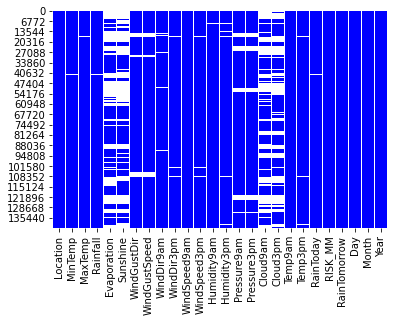

In [ ]:
import seaborn as sns
cols = data.columns 
colours = ['b', 'w'] 
sns.heatmap(data[cols].isnull(), cbar=False, cmap=sns.color_palette(colours))

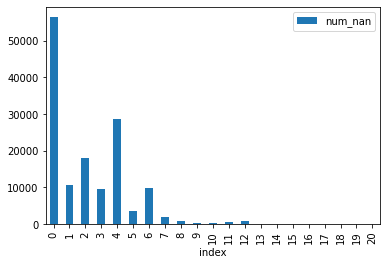

In [ ]:
for i in data.columns:
    nan = data[i].isnull()
    num_nan = np.sum(nan)
    
    if num_nan > 0:          
        data['{}_nan'.format(i)] = nan

nan_cols = [i for i in data.columns if 'nan' in i]
data['num_nan'] = data[nan_cols].sum(axis=1)
data['num_nan'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index')

Гистограмма пропущенных данных(выше)

Избавляемся от строк, где много пропусков

In [ ]:
data = data.drop(data[data['num_nan'] > 6].index, axis=0)


In [ ]:
data = data.drop(['Evaporation_nan', 'Sunshine_nan', 'WindGustDir_nan',
       'WindGustSpeed_nan', 'WindDir9am_nan', 'WindDir3pm_nan',
       'WindSpeed9am_nan', 'WindSpeed3pm_nan', 'Humidity9am_nan',
       'Humidity3pm_nan', 'Pressure9am_nan', 'Pressure3pm_nan', 'Cloud9am_nan',
       'Cloud3pm_nan', 'Temp9am_nan', 'Temp3pm_nan', 'RainToday_nan', 
       'MinTemp_nan', 'MaxTemp_nan', 'Rainfall_nan','num_nan'] , axis=1)

In [ ]:
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Day,Month,Year
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No,1,12,2008
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No,2,12,2008
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No,3,12,2008
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No,4,12,2008
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No,5,12,2008


  Удалим признак RISK_MM поскольку он уже является предсказанием и не влияет на нашу целевую функцию (поэтому стоит оставить в качестве целевой функции что-то одно), а также удалим первые 4 признака, т.к. у них слишком мало данных, признак 'Date' заменяем столбцами 'Day''Month' и 'Year'.
  

Заполняем пропуски 

In [ ]:
data = data.drop(['RISK_MM','Sunshine','Evaporation','Cloud3pm','Cloud9am'],axis = 1)

num_col = ['MinTemp', 'MaxTemp', 'Rainfall','WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
cat_col = ['Location','WindGustDir', 'WindDir9am', 'WindDir3pm']
for i in range(len(num_col)):
  mean_val = data[num_col[i]].median()
  data[num_col[i]].fillna( mean_val, inplace=True )

data['WindDir3pm'].fillna(data['WindDir3pm'].mode().values[0], inplace=True)
data['WindDir9am'].fillna(data['WindDir9am'].mode().values[0], inplace=True)
data['WindGustDir'].fillna(data['WindGustDir'].mode().values[0], inplace=True)

data['RainTomorrow'] = data['RainTomorrow'].map({'No': 0, 'Yes': 1})
data['RainToday'] = data['RainToday'].map({'No': 0, 'Yes': 1})

data['RainToday'].fillna(data['RainToday'].median(), inplace=True )

data['MinTemp'] = data['MinTemp'] + 100
data['MaxTemp'] = data['MaxTemp'] + 100 
data['Temp9am'] = data['Temp9am'] + 100
data['Temp3pm'] = data['Temp3pm'] + 100 


Теперь у нас имеются все значения

In [ ]:
data.count().sort_values()

Location         136949
Day              136949
RainTomorrow     136949
RainToday        136949
Temp3pm          136949
Temp9am          136949
Pressure3pm      136949
Pressure9am      136949
Humidity3pm      136949
Month            136949
Humidity9am      136949
WindSpeed9am     136949
WindDir3pm       136949
WindDir9am       136949
WindGustSpeed    136949
WindGustDir      136949
Rainfall         136949
MaxTemp          136949
MinTemp          136949
WindSpeed3pm     136949
Year             136949
dtype: int64

Преобразуем категориальные признаки

In [ ]:
obj_col = ['Location', 'WindGustDir', 'WindDir3pm', 'WindDir9am']
data = pd.get_dummies(data, columns = obj_col)
data

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,...,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
0,113.4,122.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,116.9,121.8,0.0,0,1,12,2008,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,107.4,125.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,117.2,124.3,0.0,0,2,12,2008,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,112.9,125.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,121.0,123.2,0.0,0,3,12,2008,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,109.2,128.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,118.1,126.5,0.0,0,4,12,2008,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,117.5,132.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,117.8,129.7,0.0,0,5,12,2008,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,103.5,121.8,0.0,31.0,15.0,13.0,59.0,27.0,1024.7,1021.2,109.4,120.9,0.0,0,20,6,2017,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
142189,102.8,123.4,0.0,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,110.1,122.4,0.0,0,21,6,2017,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
142190,103.6,125.3,0.0,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,110.9,124.5,0.0,0,22,6,2017,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
142191,105.4,126.9,0.0,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,112.5,126.1,0.0,0,23,6,2017,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


Посмотрим описание численных признаков

In [ ]:
data[num_col].describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
count,136949.000000,136949.000000,136949.000000,136949.000000,136949.000000,136949.000000,136949.000000,136949.000000,136949.000000,136949.000000,136949.000000,136949.000000
mean,112.222260,123.288047,2.311463,40.000409,14.194196,18.792616,68.598705,51.357381,1017.644730,1015.245702,117.017942,121.716688
std,6.401486,7.107804,8.380748,13.252543,8.765512,8.712405,19.022570,20.680243,6.840736,6.776054,6.506315,6.915700
min,91.500000,95.200000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,92.800000,94.600000
25%,107.600000,117.900000,0.000000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.400000,1010.900000,112.300000,116.600000
50%,112.000000,122.700000,0.000000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,116.700000,121.100000
75%,116.900000,128.300000,0.600000,46.000000,19.000000,24.000000,83.000000,65.000000,1022.000000,1019.600000,121.600000,126.400000
max,133.900000,148.100000,371.000000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,140.200000,146.700000


Как видно из таблицы, у нас имеются выбросы. Визуализируем

Text(0, 0.5, 'WindSpeed3pm')

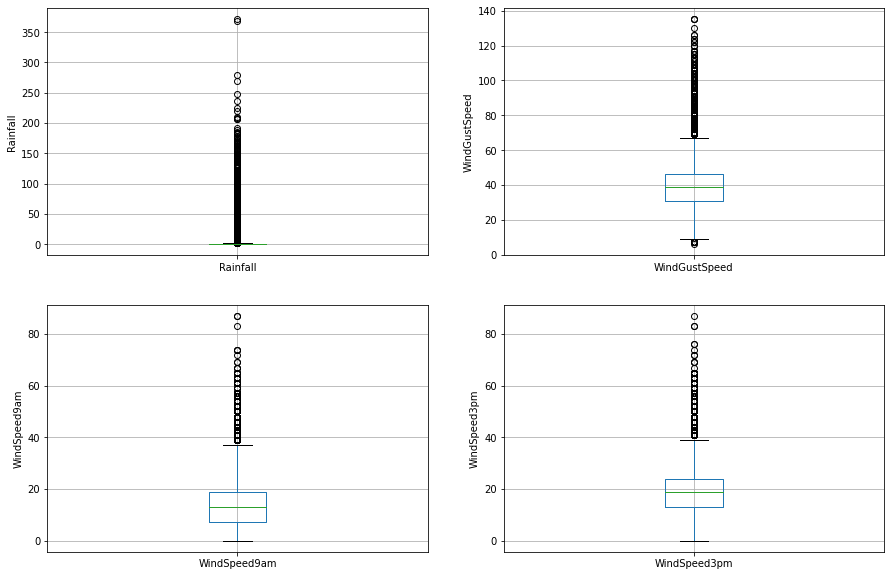

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = data.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')

plt.subplot(2, 2, 2)
fig = data.boxplot(column='WindGustSpeed')
fig.set_title('')
fig.set_ylabel('WindGustSpeed')

plt.subplot(2, 2, 3)
fig = data.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')

plt.subplot(2, 2, 4)
fig = data.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

Text(0, 0.5, 'WindSpeed3pm')

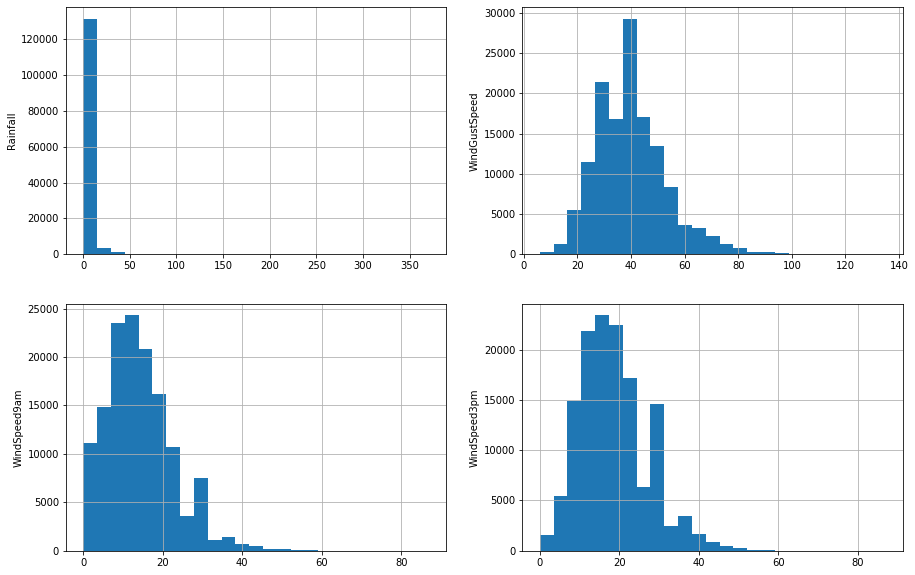

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = data.Rainfall.hist(bins=25)
fig.set_title('')
fig.set_ylabel('Rainfall')

plt.subplot(2, 2, 2)
fig = data.WindGustSpeed.hist(bins=25)
fig.set_title('')
fig.set_ylabel('WindGustSpeed')

plt.subplot(2, 2, 3)
fig = data.WindSpeed9am.hist(bins=25)
fig.set_title('')
fig.set_ylabel('WindSpeed9am')

plt.subplot(2, 2, 4)
fig = data.WindSpeed3pm.hist(bins=25)
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

In [ ]:
IQR = data.Rainfall.quantile(0.75) - data.Rainfall.quantile(0.25)
Lower = data.Rainfall.quantile(0.25) - (IQR * 3)
Upper = data.Rainfall.quantile(0.75) + (IQR * 3)

data = data[data['Rainfall'] < Upper]

In [ ]:
IQR = data.WindGustSpeed.quantile(0.75) - data.WindGustSpeed.quantile(0.25)
Lower = data.WindGustSpeed.quantile(0.25) - (IQR * 3)
Upper = data.WindGustSpeed.quantile(0.75) + (IQR * 3)

data = data[data['WindGustSpeed'] < Upper] 

In [ ]:
IQR = data.WindSpeed9am.quantile(0.75) - data.WindSpeed9am.quantile(0.25)
Lower = data.WindSpeed9am.quantile(0.25) - (IQR * 3)
Upper = data.WindSpeed9am.quantile(0.75) + (IQR * 3)

data = data[data['WindSpeed9am'] < Upper] 
data = data[data['WindSpeed9am'] > Lower] 

In [ ]:
IQR = data.WindSpeed3pm.quantile(0.75) - data.WindSpeed3pm.quantile(0.25)
Lower = data.WindSpeed3pm.quantile(0.25) - (IQR * 3)
Upper = data.WindSpeed3pm.quantile(0.75) + (IQR * 3)

data = data[data['WindSpeed3pm'] < Upper] 
data.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,...,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
count,113274.000000,113274.000000,113274.000000,113274.000000,113274.000000,113274.000000,113274.000000,113274.000000,113274.000000,113274.000000,113274.000000,113274.000000,113274.000000,113274.000000,113274.000000,113274.000000,113274.000000,113274.000000,113274.000000,113274.000000,113274.000000,113274.000000,113274.000000,113274.000000,113274.000000,113274.000000,113274.000000,113274.000000,113274.000000,113274.000000,113274.000000,113274.000000,113274.000000,113274.000000,113274.000000,113274.000000,113274.000000,113274.000000,113274.000000,113274.000000,...,113274.000000,113274.000000,113274.000000,113274.000000,113274.000000,113274.000000,113274.000000,113274.000000,113274.000000,113274.000000,113274.000000,113274.000000,113274.000000,113274.000000,113274.000000,113274.000000,113274.000000,113274.000000,113274.000000,113274.000000,113274.000000,113274.000000,113274.000000,113274.000000,113274.000000,113274.000000,113274.000000,113274.000000,113274.000000,113274.000000,113274.000000,113274.000000,113274.000000,113274.000000,113274.000000,113274.000000,113274.000000,113274.000000,113274.000000,113274.000000
mean,112.020927,123.892185,0.169938,38.912822,13.734590,18.421968,65.893462,48.150158,1018.270098,1015.645006,117.221481,122.329761,0.061073,0.165078,15.690626,6.395687,2012.765604,0.022865,0.015811,0.022203,0.024940,0.021294,0.021814,0.023015,0.023006,0.019563,0.024074,0.023580,0.018001,0.020075,0.021470,0.020455,0.022944,0.011424,0.021188,0.017542,0.022212,0.024419,0.022167,0.020940,...,0.061259,0.068551,0.064905,0.058442,0.060367,0.104402,0.054902,0.059661,0.063501,0.059449,0.063483,0.066679,0.063068,0.050223,0.057939,0.059617,0.066458,0.080557,0.064799,0.053331,0.062865,0.066405,0.058813,0.062812,0.071517,0.061338,0.058840,0.138920,0.057948,0.062362,0.055273,0.057251,0.057718,0.068339,0.065408,0.048520,0.052015,0.053057,0.048467,0.043028
std,6.471528,7.077185,0.430662,12.337013,8.473678,8.422591,18.824088,19.809456,6.552635,6.570614,6.568675,6.869066,0.239466,0.371252,8.792205,3.453218,2.531291,0.149473,0.124745,0.147343,0.155942,0.144362,0.146078,0.149952,0.149924,0.138494,0.153281,0.151737,0.132954,0.140258,0.144946,0.141551,0.149727,0.106270,0.144010,0.131278,0.147372,0.154346,0.147229,0.143185,...,0.239805,0.252689,0.246358,0.234579,0.238166,0.305782,0.227790,0.236858,0.243863,0.236464,0.243831,0.249466,0.243087,0.218406,0.233629,0.236776,0.249083,0.272155,0.246171,0.224693,0.242722,0.248990,0.235276,0.242626,0.257687,0.239950,0.235325,0.345864,0.233646,0.241813,0.228513,0.232322,0.233211,0.252327,0.247245,0.214862,0.222059,0.224149,0.214751,0.202922
min,91.500000,97.500000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,984.600000,980.200000,94.400000,96.000000,0.000000,0.000000,1.000000,1.000000,2007.000000,0.000000,0.000000,0.000000,0.000000,0.00000

Посмотрим на категориальные признаки

In [ ]:
data = data.drop(['RainToday'], axis=1)
data.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainTomorrow,Day,Month,Year,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,...,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
0,113.4,122.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,116.9,121.8,0,1,12,2008,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,107.4,125.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,117.2,124.3,0,2,12,2008,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,112.9,125.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,121.0,123.2,0,3,12,2008,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,109.2,128.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,118.1,126.5,0,4,12,2008,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,117.5,132.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,117.8,129.7,0,5,12,2008,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_corr = data.drop(data.columns[range(16,113,1)], axis='columns')
data_corr

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainTomorrow,Day,Month,Year
0,113.4,122.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,116.9,121.8,0,1,12,2008
1,107.4,125.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,117.2,124.3,0,2,12,2008
2,112.9,125.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,121.0,123.2,0,3,12,2008
3,109.2,128.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,118.1,126.5,0,4,12,2008
4,117.5,132.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,117.8,129.7,0,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,103.5,121.8,0.0,31.0,15.0,13.0,59.0,27.0,1024.7,1021.2,109.4,120.9,0,20,6,2017
142189,102.8,123.4,0.0,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,110.1,122.4,0,21,6,2017
142190,103.6,125.3,0.0,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,110.9,124.5,0,22,6,2017
142191,105.4,126.9,0.0,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,112.5,126.1,0,23,6,2017


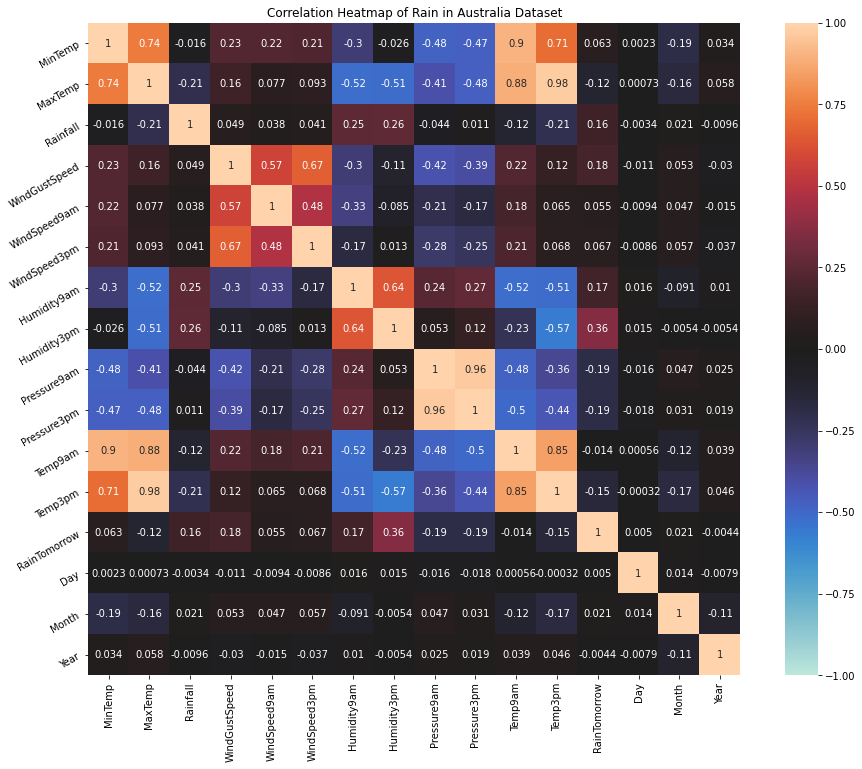

In [ ]:
import seaborn as sns
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Rain in Australia Dataset')
fig = sns.heatmap(data_corr.corr(),annot=True,square=True, linecolor='white', vmin=-1, vmax=1, center= 0)
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
fig.set_yticklabels(fig.get_yticklabels(), rotation=30)           
plt.show()


Удалим коллинеарные признаки (> 0,9)

In [ ]:
data = data.drop(['Temp3pm'], axis=1)

In [ ]:
y = data['RainTomorrow']
X = data.drop(['RainTomorrow'], axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

X_train.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Day,Month,Year,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,...,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
count,84955.000000,84955.000000,84955.000000,84955.000000,84955.000000,84955.000000,84955.000000,84955.000000,84955.000000,84955.000000,84955.000000,84955.000000,84955.000000,84955.000000,84955.000000,84955.000000,84955.000000,84955.000000,84955.000000,84955.000000,84955.000000,84955.000000,84955.000000,84955.000000,84955.000000,84955.000000,84955.000000,84955.000000,84955.000000,84955.000000,84955.000000,84955.000000,84955.000000,84955.000000,84955.000000,84955.000000,84955.000000,84955.000000,84955.000000,84955.000000,...,84955.000000,84955.000000,84955.000000,84955.00000,84955.000000,84955.000000,84955.000000,84955.000000,84955.000000,84955.000000,84955.000000,84955.000000,84955.000000,84955.000000,84955.000000,84955.000000,84955.000000,84955.00000,84955.000000,84955.000000,84955.000000,84955.000000,84955.000000,84955.000000,84955.000000,84955.000000,84955.000000,84955.000000,84955.000000,84955.000000,84955.000000,84955.000000,84955.000000,84955.000000,84955.000000,84955.000000,84955.000000,84955.000000,84955.000000,84955.000000
mean,112.020437,123.896784,0.170745,38.936696,13.750821,18.452416,65.869048,48.124489,1018.252322,1015.627942,117.224923,15.670955,6.397104,2012.757118,0.022883,0.015479,0.022165,0.025107,0.021176,0.021812,0.022836,0.022636,0.019905,0.024201,0.023789,0.017962,0.020011,0.021576,0.020787,0.022965,0.011465,0.021282,0.017374,0.022388,0.024719,0.021941,0.020846,0.015914,0.006627,0.012053,...,0.061174,0.069154,0.064717,0.05889,0.060714,0.103749,0.054358,0.059184,0.062527,0.059690,0.063952,0.066930,0.063010,0.050097,0.058042,0.059067,0.066506,0.08056,0.064964,0.053393,0.063116,0.066282,0.059031,0.062833,0.071426,0.061491,0.058819,0.138297,0.057713,0.062009,0.055959,0.057348,0.057619,0.068907,0.065752,0.047837,0.052181,0.052910,0.048708,0.043023
std,6.472187,7.074501,0.432106,12.342585,8.471820,8.433859,18.814382,19.839796,6.557072,6.572110,6.563799,8.793648,3.453036,2.529480,0.149530,0.123448,0.147220,0.156452,0.143971,0.146069,0.149380,0.148739,0.139674,0.153674,0.152392,0.132816,0.140037,0.145296,0.142673,0.149793,0.106459,0.144323,0.130661,0.147944,0.155268,0.146492,0.142871,0.125145,0.081137,0.109125,...,0.239650,0.253718,0.246027,0.23542,0.238807,0.304937,0.226724,0.235971,0.242112,0.236914,0.244668,0.249901,0.242982,0.218147,0.233825,0.235751,0.249166,0.27216,0.246463,0.224817,0.243172,0.248776,0.235685,0.242664,0.257537,0.240231,0.235288,0.345213,0.233201,0.241174,0.229844,0.232508,0.233022,0.253298,0.247850,0.213423,0.222392,0.223856,0.215258,0.202910
min,91.500000,97.900000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,984.600000,980.200000,94.700000,1.000000,1.000000,2007.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selector = SelectKBest(chi2, k=5)
selector.fit(X_train, y_train)
selector.transform(X_train)
X_train_best = pd.DataFrame(selector.transform(X_train), columns=['Rainfall', 'WindGustSpeed', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm'])
X_test_best = pd.DataFrame(selector.transform(X_test), columns=['Rainfall', 'WindGustSpeed', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm'])


# ***Байес***

In [ ]:
import time

In [ ]:
t0=time.time()

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB


classifier = GaussianNB()
classifier.fit(X_train_best, y_train)
prediction = classifier.predict(X_test_best)

score_NaiveBayes = np.mean(prediction == y_test)
t_NB = time.time()-t0

print(score_NaiveBayes)

0.8267241074896713


In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(prediction, y_test)

0.17327589251032877

[[21931  1843]
 [ 3064  1481]]


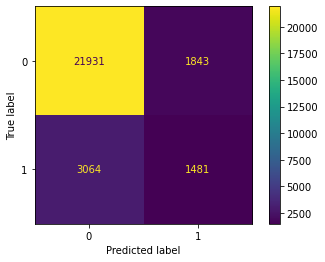

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

print (confusion_matrix(y_test, prediction))

plot_confusion_matrix(classifier, X_test_best, y_test) 
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90     23774
           1       0.45      0.33      0.38      4545

    accuracy                           0.83     28319
   macro avg       0.66      0.62      0.64     28319
weighted avg       0.81      0.83      0.82     28319



# ***Логистическая регрессия***

Логистическая регрессия требует нормализации данных

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test), index=X_test.index, columns=X_test.columns)

X_train.head()

In [ ]:
t0 = time.time()

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(penalty =  'l2', max_iter = 5000)
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_test)

t_log = time.time()-t0
score_LogReg = np.mean(prediction == y_test)

print(score_LogReg)

In [ ]:
mean_absolute_error(prediction, y_test)

In [ ]:
print (confusion_matrix(y_test, prediction))

plot_confusion_matrix(classifier, X_test, y_test) 
plt.show()

In [ ]:
print(classification_report(y_test, prediction))

# ***Соседи***

In [ ]:
scaler = MinMaxScaler()
X_train_best = pd.DataFrame(scaler.fit_transform(X_train_best), index=X_train_best.index, columns=X_train_best.columns)
X_test_best = pd.DataFrame(scaler.fit_transform(X_test_best), index=X_test_best.index, columns=X_test_best.columns)

In [ ]:
t0 = time.time()

from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=9)
neigh.fit(X_train_best, y_train)
prediction = neigh.predict(X_test_best)

t_neigh = time.time()-t0
score_KNeighbors = np.mean(prediction == y_test)

print(score_KNeighbors)

0.8556799322009958


In [ ]:
mean_absolute_error(prediction, y_test)

0.1443200677990042

[[22905   869]
 [ 3218  1327]]


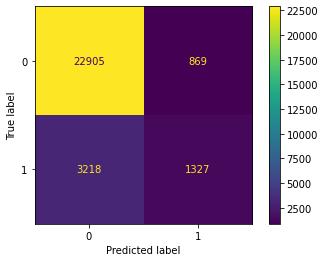

In [ ]:
print (confusion_matrix(y_test, prediction))

plot_confusion_matrix(neigh, X_test_best, y_test) 
plt.show()

In [ ]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92     23774
           1       0.60      0.29      0.39      4545

    accuracy                           0.86     28319
   macro avg       0.74      0.63      0.66     28319
weighted avg       0.83      0.86      0.83     28319



# ***Вывод***

In [ ]:
models = pd.DataFrame(
    {
    'ML Algorithm': ['Naive Bayes', 'Logistic Regression', 'KNeighborsClassifier'],
    'Score': [score_NaiveBayes, score_LogReg, score_KNeighbors],
    'Time': [t_NB, t_log, t_neigh]
    }
)
models.sort_values(by='Score', ascending=False)

,ML Algorithm,Score,Time
1,Logistic Regression,0.871394,4.889664
2,KNeighborsClassifier,0.855680,5.847868
0,Naive Bayes,0.826724,0.027087


Видим, что Logistic Regression дает наиболее точный результат. Рассмотрим на основе этой модели наиболее значимые признаки

In [ ]:
classifier = LogisticRegression(penalty =  'l2', max_iter = 5000) 
classifier.fit(X_train, y_train)
coefs = np.abs(classifier.coef_[0])
indices = np.argsort(coefs)[::-1]

pd.DataFrame([X_train.columns, classifier.coef_[0]])
#print(pd.DataFrame(classifier.coef_))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110
0,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Day,Month,Year,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,...,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
1,2.25685,-1.87741,0.598067,4.69428,-0.503503,-1.87777,-0.0382125,6.7497,5.85383,-10.1611,-0.18022,-0.0555375,0.165773,0.125876,0.652133,-0.520658,0.597698,0.27023,0.233923,-0.256216,0.343955,0.282986,-0.152208,0.246781,0.480393,-0.132555,0.0603128,-0.806349,-0.48967,-0.393225,-1.04479,-0.416341,0.346497,-0.0552242,0.300348,0.476856,0.345811,-1.53062,-0.285154,-0.0899202,...,0.0571778,0.0815513,0.0927904,0.0509289,0.0426552,0.0689606,0.0547017,-0.0214076,-0.110592,-0.0393896,-0.151922,0.299679,-0.166452,0.144749,0.407079,0.390713,-0.0802069,-0.0822,-0.152932,-0.150639,-0.302699,-0.0218912,0.214358,-0.191589,-0.0979202,0.124684,-0.163298,0.0924597,0.173063,0.306311,0.0787137,0.0824226,-0.2683,-0.202019,-0.190567,-0.040647,0.00532529,-0.0124388,0.0847052,0.0335717


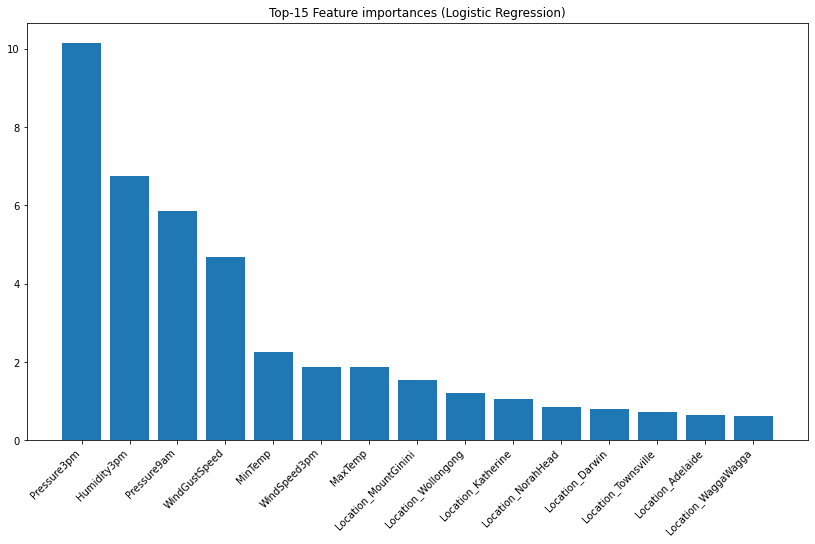

In [ ]:
plt.figure(figsize=(14,10))
plt.title("Top-15 Feature importances (Logistic Regression)")
plt.bar(range(15), coefs[indices[:15]], align="center")
plt.xticks(range(15), X_train.columns[indices[:15]], rotation=45, ha='right')
plt.subplots_adjust(bottom=0.3)